#Identification of Duplicate Questions:

There are many online platforms like Quora and Stack Exchange where people share their knowledge, and ask questions. These platforms do not want duplicate entries of questions, as this can be bad impression. Hence, the algorithm must be developed to prevent community members from answering the same question multiple times.

There are few machine learning techniques which will help to solve this problem.


##Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# import re
# import time
# import warnings
# import sqlite3
# from sqlalchemy import create_engine # database connection
# import csv
# import os
# warnings.filterwarnings("ignore")
# import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Get the data

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/natural language processing/Identificarion of duplicate Questions/train.csv', encoding = 'latin-1')

In [10]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [11]:
final = pd.DataFrame()
final['Text'] = df['question1'] + ' ' + df['question2']
final['id'] = df['id']

In [13]:
final

,Text,id
0,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,1
2,How can I increase the speed of my internet co...,2
3,Why am I mentally very lonely? How can I solve...,3
4,"Which one dissolve in water quikly sugar, salt...",4
...,...,...
404285,How many keywords are there in the Racket prog...,404285
404286,Do you believe there is life after death? Is i...,404286
404287,What is one coin? What's this coin?,404287
404288,What is the approx annual cost of living while...,404288


#Handling the missing values

In [14]:
nan_rows = final[final.isnull().any(1)]
print (nan_rows)

       Text      id
105780  NaN  105780
201841  NaN  201841
363362  NaN  363362


In [15]:
final = final.fillna('')
nan_rows = final[final.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Text, id]
Index: []


In [16]:
final

,Text,id
0,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,1
2,How can I increase the speed of my internet co...,2
3,Why am I mentally very lonely? How can I solve...,3
4,"Which one dissolve in water quikly sugar, salt...",4
...,...,...
404285,How many keywords are there in the Racket prog...,404285
404286,Do you believe there is life after death? Is i...,404286
404287,What is one coin? What's this coin?,404287
404288,What is the approx annual cost of living while...,404288


In [17]:
final['Text'][105780]

''

In [19]:
Y= df['is_duplicate']

In [20]:
final = final.drop('id',axis=1)
final.head()

,Text
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


#Split the data into test and train

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(final,Y, stratify=Y, test_size=0.3,random_state=13)

#Vectorize the data and train the model

- Vectorization: import tfidf from scikit-learn
- Training: We will use 4 scikit learn models for training
> 1.  LOGISTIC REGRESSION with SGD training 
> 2.  Linear Support Vector Machine with SGD training
> 3.  XGBOOST
> 4.  TFIDF weighted W2V

- Then, we will evaluate model with the help of confusion matrix

###Import libraries 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer  # vectorization
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier  # logistic regression with SGD training
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import LinearSVC  # Linear Support Vector Machine

import xgboost as xgb #XGboost training
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix  # For evaluation
from sklearn.metrics.classification import accuracy_score, log_loss


# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import normalize
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.manifold import TSNE
# import seaborn as sns
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics.classification import accuracy_score, log_loss
# from sklearn.feature_extraction.text import TfidfVectorizer
# from collections import Counter
# from scipy.sparse import hstack
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold 
# from collections import Counter, defaultdict
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# import math
# from sklearn.metrics import normalized_mutual_info_score
# from sklearn.ensemble import RandomForestClassifier

In [37]:
tfidf_vect = TfidfVectorizer()
train_tfidf = tfidf_vect.fit_transform(X_train['Text'])
test_tfidf = tfidf_vect.transform(X_test['Text'])

In [29]:
# This function plots the confusion matrices given y_i, y_i_hat.

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]

    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#LOGISTIC REGRESSION with SGD training

For values of alpha =  1e-05 The log loss is: 0.5058998120028465
For values of alpha =  0.0001 The log loss is: 0.5359841535916035
For values of alpha =  0.001 The log loss is: 0.5682712944398893
For values of alpha =  0.01 The log loss is: 0.5816572246015279
For values of alpha =  0.1 The log loss is: 0.6277846248704374
For values of alpha =  1 The log loss is: 0.6401103582140618
For values of alpha =  10 The log loss is: 0.6413876872650435


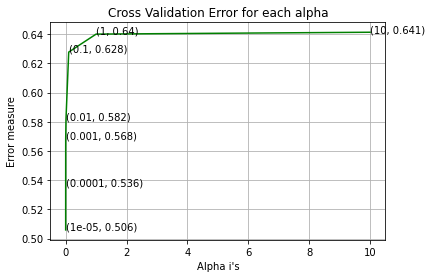

In [38]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.



log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_tfidf, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_tfidf, Y_train)
    predict_y = sig_clf.predict_proba(test_tfidf)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of best alpha =  1e-05 The train log loss is: 0.4841059138622892
For values of best alpha =  1e-05 The test log loss is: 0.5058998120028465
Total number of data points : 121287


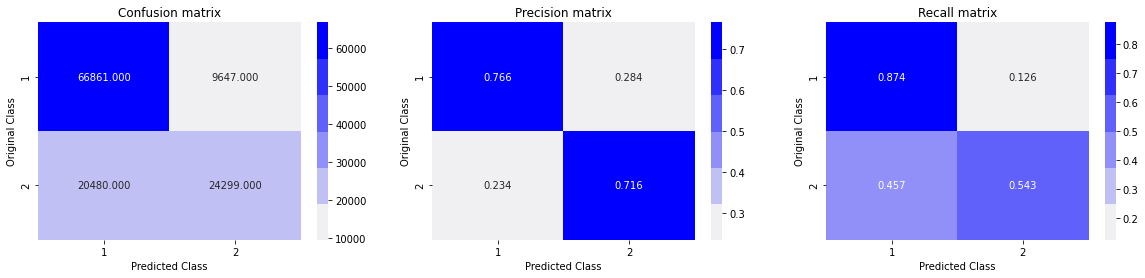

In [39]:
#Ploting the confusion matrix for the best alpha value

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_tfidf, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_tfidf, Y_train)

predict_y = sig_clf.predict_proba(train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

#Linear Support Vector Machine with SGD training

For values of alpha =  1e-05 The log loss is: 0.524364256441197
For values of alpha =  0.0001 The log loss is: 0.5781652488690349
For values of alpha =  0.001 The log loss is: 0.6372744091699156
For values of alpha =  0.01 The log loss is: 0.65852782563227
For values of alpha =  0.1 The log loss is: 0.65852782563227
For values of alpha =  1 The log loss is: 0.6585278256322702
For values of alpha =  10 The log loss is: 0.6585278256322702


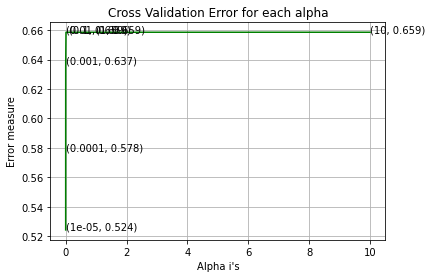

In [42]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(train_tfidf, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_tfidf, Y_train)
    predict_y = sig_clf.predict_proba(test_tfidf)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  1e-05 The train log loss is: 0.5090524945307552
For values of best alpha =  1e-05 The test log loss is: 0.524364256441197
Total number of data points : 121287


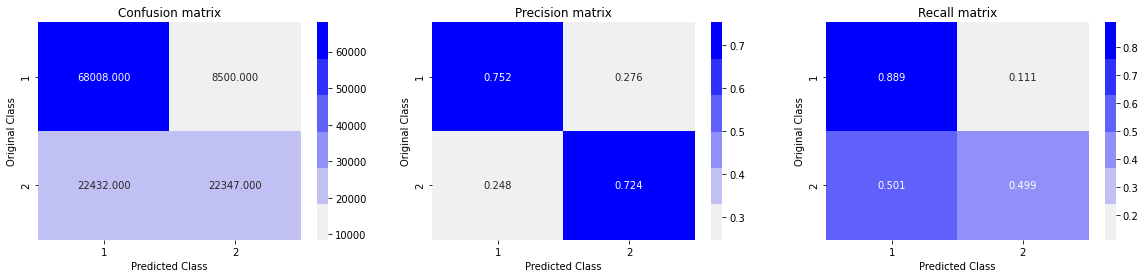

In [43]:
#Ploting the confusion matrix for the best alpha value

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(train_tfidf, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_tfidf, Y_train)

predict_y = sig_clf.predict_proba(train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

#Summary

In [45]:
from prettytable import PrettyTable
    
x = PrettyTable(["METHOD", "Best Hyperparameter", "Test Logloss"])
x.align["METHOD"] = "l"
x.align["Best Hyperparameter"] = "l"
x.add_row(["Logistic Regression(Tfidf)"," alpha = 0.00001 \n ------------","0.5058998120028465\n -----------"])
x.add_row(["Linear SVM(Tfidf)"," alpha = 0.00001 \n ------------","0.524364256441197\n -----------"])

print(x.get_string(title="UNIVARIATE ANALYSIS"))

+-----------------------------------------------------------------------+
|                          UNIVARIATE ANALYSIS                          |
+----------------------------+---------------------+--------------------+
| METHOD                     | Best Hyperparameter |    Test Logloss    |
+----------------------------+---------------------+--------------------+
| Logistic Regression(Tfidf) |  alpha = 0.00001    | 0.5058998120028465 |
|                            |  ------------       |     -----------    |
| Linear SVM(Tfidf)          |  alpha = 0.00001    | 0.524364256441197  |
|                            |  ------------       |     -----------    |
+----------------------------+---------------------+--------------------+
